#### Importo librerías.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
print("Loading data...")

Loading data...


#### Importo el dataset final de alquileres.
Con este datasete entreno el modelo.

In [60]:
dataset = pd.read_excel('..\data\Dataset_final_alquileres.xlsx')
dataset.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,RMP,RMH
0,Piso,Madrid Capital,17000,1280,3,2,1328,Tetuán,1,197511,182,170260.0,399910.0
1,Piso,Madrid Capital,10000,500,1,1,200,Ciudad Lineal,1,188077,1597,168900.0,413110.0
2,Piso,Madrid Capital,34000,1600,4,3,2125,Salamanca,1,37105,2649,259560.0,602170.0
3,Chalet,Pozuelo de Alarcón,45000,5300,6,5,849,Pozuelo de Alarcón,0,464862,1921,271670.0,864030.0
4,Casa,Madrid Capital,42500,4610,3,4,922,Fuencarral-El Pardo,1,243259,1445,206710.0,551250.0


In [61]:
dataset.dtypes

Tipo_vivienda     object
Población         object
Precio             int64
Superficie         int64
Habitaciones       int64
Baños              int64
Precio/m²          int64
Zonas             object
Zona_binaria       int64
PMZona             int64
PMm²Zona           int64
RMP              float64
RMH              float64
dtype: object

In [62]:
dataset.drop([99, 1267], axis=0, inplace=True)
dataset.reset_index(inplace=True, drop=True)

In [63]:
dataset.drop(columns=['Población','Precio/m²','Zonas','PMm²Zona', 'Zona_binaria'], inplace=True)
dataset

,Tipo_vivienda,Precio,Superficie,Habitaciones,Baños,PMZona,RMP,RMH
0,Piso,17000,1280,3,2,197511,170260.0,399910.0
1,Piso,10000,500,1,1,188077,168900.0,413110.0
2,Piso,34000,1600,4,3,37105,259560.0,602170.0
3,Chalet,45000,5300,6,5,464862,271670.0,864030.0
4,Casa,42500,4610,3,4,243259,206710.0,551250.0
...,...,...,...,...,...,...,...,...
1523,Piso,20000,620,1,1,260378,191990.0,383600.0
1524,Piso,10800,650,2,1,159208,201030.0,466990.0
1525,Piso,15000,810,2,2,159208,201030.0,466990.0
1526,Piso,10000,700,2,1,98493,110590.0,306730.0


In [64]:
dataset.dtypes

Tipo_vivienda     object
Precio             int64
Superficie         int64
Habitaciones       int64
Baños              int64
PMZona             int64
RMP              float64
RMH              float64
dtype: object

#### Estudio de la relación de cada feature con el target.
El target es el precio del alquiler.
* Precio: variable numérica continua.
Por tanto las features son las demás columnas y estudiamos si tienen relación con el target.
Features: 
 * Tipo_vivienda: variable categórica nominal. Tres valores posibles: 'Piso', 'Chalet', 'Casa'
 * Superficie: variable numérica continua.
 * Habitaciones: variable numérica discreta.
 * Baños: variable numérica discreta.
 * Zona_binaria: variable numérica discreta. 
 * PMZona: variable numérica continua.
 * RMP: variable numérica continua.
 * RMH: variable numérica continua.

***Relación entre feature Tipo_vivienda y el precio***.

Como Tipo_vivienda es uan variable categórica y el precio es una variable numérica la forma para ver mejor la relación existente entre ambas variables es mediante un box-plot. 

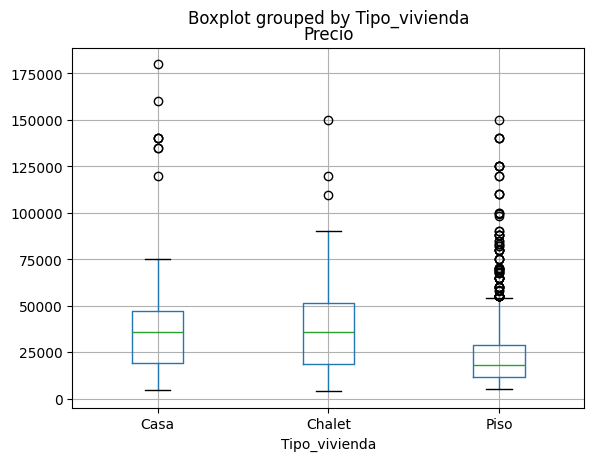

In [65]:
dataset[['Tipo_vivienda','Precio']].boxplot(column='Precio', by='Tipo_vivienda')
plt.show()

Como se puede observar en el box plot de arriba el precio esta relacionado con el tipo de vivienda, ya que la mediana de los precios así como las cajas son diferentes y si no hubiera relación entre las variables las cajas y sus medianas tendrían que ser iguales 

***Relación entre la feature superficie y el precio.***

Como las dos son variables numéricas la mejor forma de ver su relación es con un gráfico escatter plot.

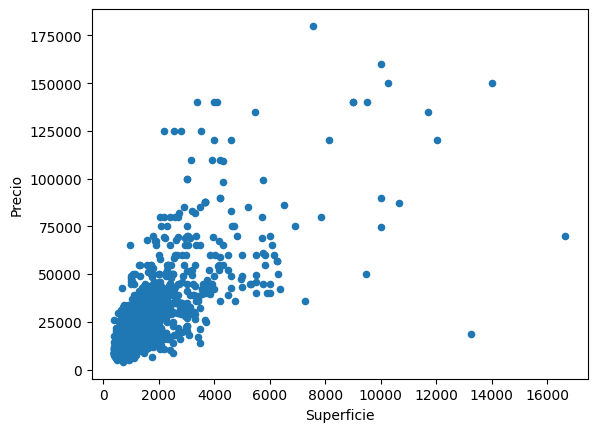

In [66]:
dataset.plot.scatter(x='Superficie', y='Precio')
plt.show()

***Relación entre la feature habitaciones y el precio.***

Como las dos son variables numéricas la mejor forma de ver su relación es con un gráfico escatter plot.

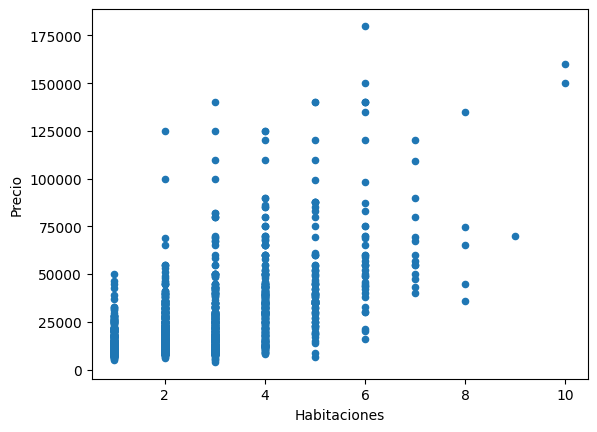

In [67]:
dataset.plot.scatter(x='Habitaciones', y='Precio')
plt.show()

***Relación entre la feature baños y el precio.***

Como las dos son variables numéricas la mejor forma de ver su relación es con un gráfico escatter plot.

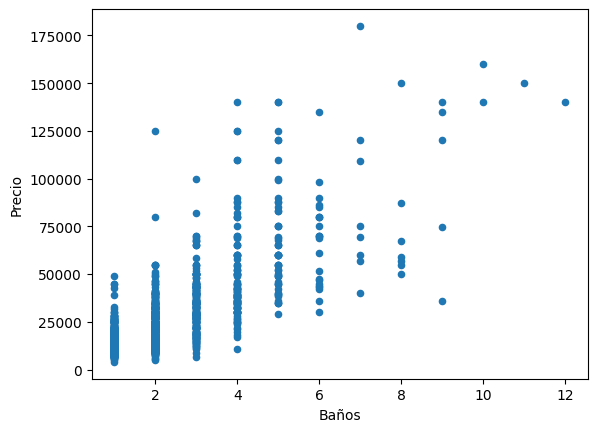

In [68]:
dataset.plot.scatter(x='Baños', y='Precio')
plt.show()

***Relación entre la feature zona_binaria y el precio.***

Como las dos son variables numéricas la mejor forma de ver su relación es con un gráfico escatter plot.

In [ ]:
dataset.plot.scatter(x='Zona_binaria', y='Precio')
dataset.boxplot(column='Precio', by='Zona_binaria')
plt.show()

***Relación entre la feature PMZona y el precio.***

Como las dos son variables numéricas la mejor forma de ver su relación es con un gráfico escatter plot.

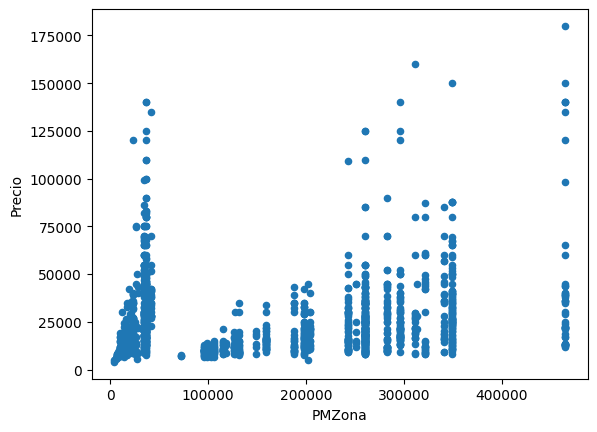

In [70]:
dataset.plot.scatter(x='PMZona', y='Precio')
plt.show()

***Relación entre la feature RMP y el precio.***

Como las dos son variables numéricas la mejor forma de ver su relación es con un gráfico escatter plot.

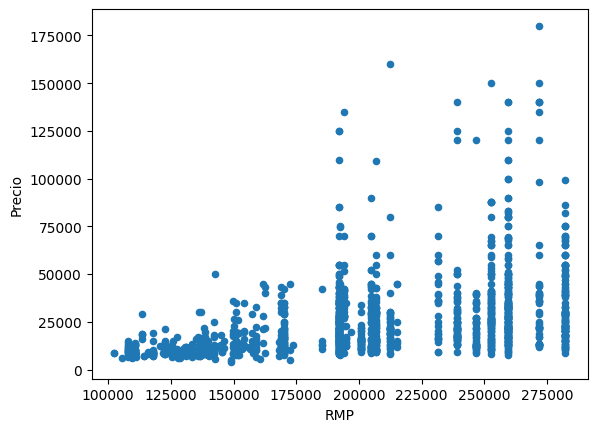

In [71]:
dataset.plot.scatter(x='RMP', y='Precio')
plt.show()

***Relación entre la feature RMH y el precio.***

Como las dos son variables numéricas la mejor forma de ver su relación es con un gráfico escatter plot.

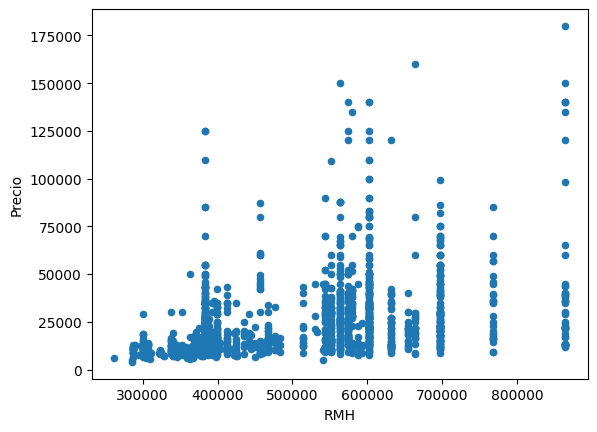

In [72]:
dataset.plot.scatter(x='RMH', y='Precio')
plt.show()

***Correlaciones de las feature con el precio***.

Cálculo las correlaciones de las feature con el precio para ver como de fuerte es su relación.

In [73]:
dataset[['Precio','Superficie', 'Habitaciones', 'Baños', 'PMZona', 'RMP', 'RMH']].corr()

,Precio,Superficie,Habitaciones,Baños,PMZona,RMP,RMH
Precio,1.000000,0.729224,0.550605,0.764744,0.157904,0.431141,0.373028
Superficie,0.729224,1.000000,0.742694,0.845097,0.120145,0.199031,0.296341
Habitaciones,0.550605,0.742694,1.000000,0.782819,0.036483,0.076742,0.207813
Baños,0.764744,0.845097,0.782819,1.000000,0.107216,0.277417,0.359293
PMZona,0.157904,0.120145,0.036483,0.107216,1.000000,0.172843,0.160379
RMP,0.431141,0.199031,0.076742,0.277417,0.172843,1.000000,0.861515
RMH,0.373028,0.296341,0.207813,0.359293,0.160379,0.861515,1.000000


In [74]:
dataset.dtypes

Tipo_vivienda     object
Precio             int64
Superficie         int64
Habitaciones       int64
Baños              int64
PMZona             int64
RMP              float64
RMH              float64
dtype: object

In [89]:
dataset.isnull

<bound method DataFrame.isnull of      Tipo_vivienda  Precio  Superficie  Habitaciones  Baños  PMZona       RMP  \
0             Piso   17000        1280             3      2  197511  170260.0   
1             Piso   10000         500             1      1  188077  168900.0   
2             Piso   34000        1600             4      3   37105  259560.0   
3           Chalet   45000        5300             6      5  464862  271670.0   
4             Casa   42500        4610             3      4  243259  206710.0   
...            ...     ...         ...           ...    ...     ...       ...   
1523          Piso   20000         620             1      1  260378  191990.0   
1524          Piso   10800         650             2      1  159208  201030.0   
1525          Piso   15000         810             2      2  159208  201030.0   
1526          Piso   10000         700             2      1   98493  110590.0   
1527          Piso   12000         400             2      1   37105  259560

#### Importo las librerías de sklearn.
Voy a realizar un modelo de regresión lineal.

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#### Separo las features del target.
Guardando en una variable las features y en otra el target.

In [76]:
x = dataset.drop(columns=['Precio'])
y = dataset['Precio']

El método fit() ayuda a ajustar los datos a un modelo, el método transform() ayuda a transformar los datos en una forma más adecuada para el modelo. El método fit_transform(), por su parte, combina las funcionalidades de los métodos fit() y transform() en un solo paso.
* fit_transform() se utiliza en los datos de entrenamiento para que podamos escalar los datos de entrenamiento y también aprender los parámetros de escalado de estos datos. Aquí, el modelo construido por nosotros aprenderá los medios y la variación de las características del conjunto de entrenamiento. Estos paraámetro aprendidos se utilizan para escalar nuestros datos de prueba.
* transform()
Utilizando el método transform() podemos utilizar la misma media y variación que se calcula a partir de nuestros datos de entrenamiento para transformar nuestros datos de prueba. Así, los parámetros aprendidos por nuestro model utilizando los datos de entrenamiento nos ayudarán a transformar nuestros datos de prueba.

#### Transform las features categóricas en variables numéricas.

Para realiazar este proceso utilizo la función OneHotEncoder.

Esta transformación la puedo realizar antes de la partición de datos ya que esta no tiene nada que no aprende ningun parámetro que aprender de los datos de train y luego aplicarlos en los de test.

1. Guardo en una variable el nombre de la feature que sean categóricas y creo el objeto OneHotEncoder al cual llamo Encoder.

In [77]:
var_categorical = ['Tipo_vivienda']
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

2. Entreno el encoder y transformo la feature categórica..
Para ello utilizo el método fit_transform() 

In [78]:
data_encoder=encoder.fit_transform(x[var_categorical])

In [79]:
columns_encoder= encoder.get_feature_names_out()

In [80]:
df_encoder = pd.DataFrame(data_encoder, columns=columns_encoder)
df_encoder

,Tipo_vivienda_Chalet,Tipo_vivienda_Piso
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,0.0
...,...,...
1523,0.0,1.0
1524,0.0,1.0
1525,0.0,1.0
1526,0.0,1.0


3. Cambio la variable categórica por el resultado obtenido en el encoder.

In [81]:
X=pd.concat([df_encoder, x], axis=1).drop(columns=['Tipo_vivienda'], axis=1)

***Divido tanto el target, como las features en datos de entrenamiento y de test.***

Para ello utilizo la función train_test_split(). Esta función permite hacer una división de un ocnjunto de datos en dos bloques de entrenamiento y prueba de un modelo (train and text).

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train

,Tipo_vivienda_Chalet,Tipo_vivienda_Piso,Superficie,Habitaciones,Baños,PMZona,RMP,RMH
196,0.0,1.0,1330,2,2,41250,193940.0,579620.0
1125,0.0,1.0,740,2,1,10325,127450.0,363170.0
1285,0.0,1.0,900,3,1,8600,121840.0,348650.0
81,0.0,0.0,3630,3,4,243259,206710.0,551250.0
1431,0.0,1.0,890,3,2,5750,160500.0,309650.0
...,...,...,...,...,...,...,...,...
1130,0.0,1.0,1080,4,1,105767,107970.0,300230.0
1294,0.0,1.0,410,2,1,103472,109410.0,286810.0
860,0.0,1.0,590,1,1,37105,259560.0,602170.0
1459,0.0,1.0,500,2,1,23526,246590.0,632050.0


In [84]:
X_test

,Tipo_vivienda_Chalet,Tipo_vivienda_Piso,Superficie,Habitaciones,Baños,PMZona,RMP,RMH
439,0.0,1.0,880,3,1,296197,239250.0,574480.0
76,0.0,1.0,900,2,2,260378,191990.0,383600.0
1142,1.0,0.0,3300,4,3,21000,157290.0,441380.0
661,0.0,1.0,560,1,1,23526,246590.0,632050.0
1036,0.0,1.0,1350,2,3,37105,259560.0,602170.0
...,...,...,...,...,...,...,...,...
1176,0.0,1.0,700,3,1,115184,122750.0,NaN
838,0.0,1.0,1400,2,2,105767,107970.0,300230.0
724,0.0,0.0,6900,6,7,26900,192570.0,587880.0
233,0.0,0.0,1970,3,3,148667,149960.0,435030.0


***Creo el modelo de machine learning.***

En este caso voy a crear un modelo de regresión lineal.

1. Creo el objeto modelo.

In [85]:
modelo = LinearRegression()

2. Entreno el modelo.

In [86]:
modelo_fit=modelo.fit(X_train, Y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

3. Hago las predicciones con los datos de test.

In [46]:
predicciones = modelo_fit.predict(X_test)

NameError: name 'modelo_fit' is not defined

In [114]:
predicciones

array([ 1662.95655455,  2786.02786361,  2760.30542383,  1000.76437051,
        3979.13707056,   387.39231179,  3122.85025296,   473.98879641,
        4201.42418176,   536.70428956,  1639.02358878,  2660.9133888 ,
        1972.34268252,  2116.16618997,  1534.72934341,   570.70071659,
        3507.10324535,  1625.22349523,  2655.36442003,  1254.72367513,
         758.76367245,  1075.58780837,   543.68805688,  5935.8242508 ,
         412.65627204,  1274.33991414,  1302.08475798,   565.68938682,
        4132.85749388,  1376.49404795,  2996.0250687 ,  2116.16618997,
        1528.98521943,  1866.99784302,  3618.08262071,  1555.116741  ,
        3668.1264021 ,   803.1554226 ,  2221.11477857,  1072.01553167,
        1783.7633115 ,   412.89312235,  4719.80075996,  3756.56215042,
        3840.04137144,  4570.16549408,  2611.15861249,  1828.15506164,
        1004.74716337,  8128.7566434 ,  5819.86895663,  2951.63331856,
        1236.93719259,  3157.27725312,   374.7671767 ,   357.34839165,
      

***Metrics and scoring: cuantificación de la calidad de las predicciones:***

Hay 3 formas diferentes de evaulación de la calidad de las predicciones de los modelos:

* Método del estimator score: los estimadores tienen un método score que proporciona un criterio de evaulación determinado para el problema que están diseñados para resolver.
* Método Scoring parameter: las herramientas de evaulación de modelos que utilizan validación cruzada (como model_selection.cross_val_score y model_selection.GridSearchCv) se basan en una estrategia de puntuación interna.
* Método Metric functions: el módulo sklearn.metrics módulo que implementa funciones que evalúan el error de predicción para própositos específicos.


r2_score (coeficiente de determinación): función de puntuación de regresión.
Su valor está comprendido entre 0 y 1, siendo 1 predicciones perfectas y 0 predicciones imperfectas.

In [115]:
from sklearn import metrics
metrics.r2_score(Y_test, predicciones)

0.7112326222380991

In [116]:
metrics.r2_score(Y_train, modelo_fit.predict(X_train))

0.7358435995140986

***Cross-validation: evaulación del rendimiento del estimador***

Aprender los parámetros de una función de predicción y probarla con los mismos datos es un error metodológico: un modelo que simplemente repetería las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta pero no predecidiría nada útil todavía. datos no vistos. Esta situación se llama sobreajuste. para evitarlo, es una práctica común al realizar un experimento de aprendizaje automático (supervisado) mantener parte de los datos disponibles como un conjunto de prueba.

Funciones: 
* cross_validate(): realiza el entrenamiento del modelo dejando cada vez distintos datos en la parte de train y test como le indiques.
* cros_val_predict(): realiza las predicciones con lo aprendido en el cross_validate.
* cross_val_score(): es la forma más sencilla de utilizar la validación cruzada.

In [90]:
from sklearn.model_selection import cross_validate, cross_val_predict
cross_validate(modelo, X, y, cv=6, scoring='r2', return_train_score=True)

ValueError: 
All the 6 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\linear_model\_base.py", line 578, in fit
    X, y = self._validate_data(
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\utils\validation.py", line 1192, in check_X_y
    X = check_array(
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\utils\validation.py", line 1003, in check_array
    _assert_all_finite(
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "e:\Folder_python\venv-3.10\lib\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [118]:
predicciones_cross_validate = cross_val_predict(modelo, X, y, cv=6)

In [119]:
metrics.r2_score(y, predicciones_cross_validate)

0.701279408760952

***sklearn.model_selection.GridSearchCV.***

Búsqueda exhaustiva de valores de parámetros específicos para un estimador.

Atributos.
GridSearchCV.cv_results: muestra los resultados de la búsqueda de parámetros.
GridSearchCV.best_params: muestra los parámetros que dio los mejores resultados.
GridSearchCV.best_score: muestra la mejor puntuación conseguida.
GridSearchCV.best_estimator: estimador que dio la puntuación más alta.


In [120]:
grid_params = {
    'fit_intercept': [True, False]
    }

In [121]:
gs = GridSearchCV(modelo,  grid_params, cv = 6, verbose=1, return_train_score=True, scoring='r2')

In [122]:
gs.fit(X,y)

Fitting 6 folds for each of 2 candidates, totalling 12 fits


GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2', verbose=1)

In [123]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.002517,0.000513,0.001302,0.000460,True,{'fit_intercept': True},0.737659,0.703767,0.662057,0.755674,...,0.173505,1,0.729548,0.720341,0.740329,0.723525,0.722153,0.757114,0.732168,0.012979
1,0.001845,0.000379,0.001352,0.000461,False,{'fit_intercept': False},0.716182,0.689893,0.648469,0.743622,...,0.168621,2,0.720093,0.708789,0.729712,0.712296,0.710586,0.744919,0.721066,0.012794


In [124]:
results['param_fit_intercept']

0     True
1    False
Name: param_fit_intercept, dtype: object

<Axes: xlabel='param_fit_intercept'>

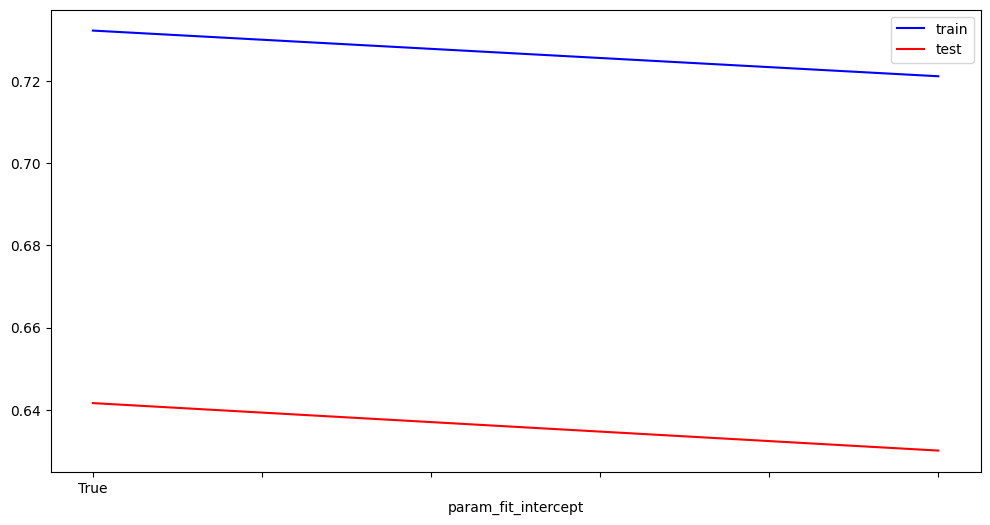

In [125]:
fig, ax= plt.subplots(figsize=(12,6))
results[['mean_train_score', 'mean_test_score', 'param_fit_intercept']].plot('param_fit_intercept', 'mean_train_score', ax=ax, label='train', color='b')
results[['mean_train_score', 'mean_test_score', 'param_fit_intercept']].plot('param_fit_intercept', 'mean_test_score', ax=ax, label='test', color='r')

RANDOM FOREST.

In [91]:
from sklearn.ensemble import RandomForestRegressor

modelo_bosque = RandomForestRegressor()

In [92]:
grid_params_bosque = {
    'max_depth': [3, 4, 5],
    'min_samples_split':[2,3,5,6],
    'min_samples_leaf':[2,3,5,6],
    'max_features': [4,6,8,10]
}

In [93]:
gs_bosque=GridSearchCV(modelo_bosque, grid_params_bosque, cv=5, verbose=1, return_train_score=True, scoring='r2')

In [94]:
gs_bosque.fit(X,y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


KeyboardInterrupt: 

In [130]:
gs_bosque.cv_results_

{'mean_fit_time': array([0.13890891, 0.12334566, 0.10212226, 0.10724006, 0.10656466,
        0.10842714, 0.1013711 , 0.10458894, 0.10449653, 0.10540938,
        0.10410342, 0.10319238, 0.10343704, 0.10203629, 0.10517278,
        0.10460391, 0.12071471, 0.1250751 , 0.12084737, 0.12294164,
        0.12188034, 0.12214627, 0.12179179, 0.12330141, 0.12293735,
        0.12212763, 0.12394381, 0.1238802 , 0.12154751, 0.12392159,
        0.1190207 , 0.1131197 , 0.13112297, 0.1357553 , 0.14024711,
        0.13789649, 0.13348918, 0.13129411, 0.14005389, 0.14438362,
        0.14420209, 0.1389782 , 0.13838472, 0.14151912, 0.14120746,
        0.14035544, 0.13874602, 0.1405004 , 0.14236784, 0.14139128,
        0.13926034, 0.14070249, 0.14053001, 0.14177475, 0.13887277,
        0.13993363, 0.13729582, 0.13984118, 0.13706031, 0.1393374 ,
        0.14734397, 0.13257709, 0.14017787, 0.14384818, 0.13198891,
        0.14409065, 0.13201404, 0.13162117, 0.12376308, 0.13105168,
        0.13488541, 0.13609929,

In [131]:
gs_bosque.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [134]:
modelo_bosque_param=RandomForestRegressor(max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=3)

In [135]:
cross_validate(modelo_bosque_param, X, y, cv=6, scoring='r2', return_train_score=True)

{'fit_time': array([0.14110851, 0.13749385, 0.14850283, 0.15124655, 0.14012599,
        0.13470101]),
 'score_time': array([0.00499868, 0.00398207, 0.00604963, 0.00497103, 0.00404072,
        0.00508571]),
 'test_score': array([0.75693903, 0.70869194, 0.68152663, 0.77036277, 0.82393188,
        0.64692805]),
 'train_score': array([0.83236327, 0.82272743, 0.83376174, 0.82802263, 0.82111207,
        0.83146272])}

In [137]:
resultados_random=cross_val_predict(modelo_bosque_param, X, y, cv=6)

In [138]:
metrics.r2_score(y, resultados_random)

0.749037009071222